In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Input, layers
from keras_preprocessing import image
from google.colab import drive
drive.mount('/content/drive')

import PIL
import PIL.Image

my_image_dir = "/content/drive/MyDrive/mltest/airplane-flight.jpg"

print(tf.__version__)

Mounted at /content/drive
2.4.1


In [ ]:
cifar10 = tf.keras.datasets.cifar10
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()


170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
dataset = "cifar"
if dataset =="fashion_mnist":
 fashion_mnist = tf.keras.datasets.fashion_mnist
 (train_images , train_labels),(test_images , test_labels)= fashion_mnist.load_data()
 class_names = ['T-shirt/top' , 'Trouser', 'Pullover','Dress','Coat' ,
                'Sandal' ,'Shirt','Sneaker','Shirt','Sneaker' ,'Bag','Ankle boot']
elif dataset =="cifar":
 (train_images , train_labels),(test_images , test_labels)= tf.keras.datasets.cifar10.load_data()
class_names = ['aeroplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()
input_shape = train_images.shape[1:]
train_images = train_images/ 255.0
test_images = test_images/255.0
print("training Images range from {:2.5f} to {:2.5f}".format(np.min(train_images), np.max(train_images)))
print("test     Images range from {:2.5f} to {:2.5f}".format(np.min(test_images), np.max(test_images)))

    

training Images range from 0.00000 to 1.00000
test     Images range from 0.00000 to 1.00000


In [ ]:
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))
train_labels



(50000, 32, 32, 3)
50000
(10000, 32, 32, 3)
10000


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

array([[  9.611517 , -12.968379 , -45.39272  , -33.24446  , -17.00573  ,
         70.91546  ,   2.5873861, -23.874725 ,  -8.262569 ,  32.82133  ]],
      dtype=float32)

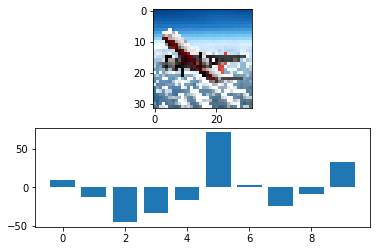

In [ ]:
 my_image = image.load_img(my_image_dir , target_size=(32, 32))
nw_image = np.array([image.img_to_array(my_image, dtype = np.uint8)])
new_image = model.predict(nw_image)
plt.subplot(2,1,1)
plt.imshow(nw_image [0,:,:], cmap='Greys')
plt.subplot(2,1,2)
plt.bar(np.arange(10), new_image[0])
new_image

(32, 32, 3)

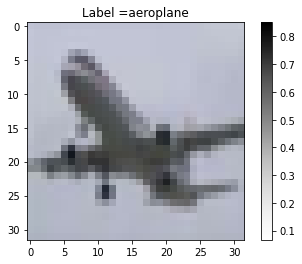

In [ ]:
idx= 45270
plt.figure()
plt.imshow(train_images[idx], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.title("Label ={:}".format(class_names[train_labels[idx]]))
input_shape

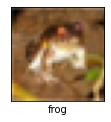

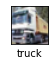

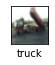

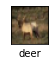

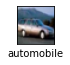

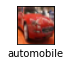

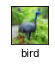

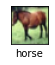

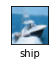

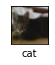

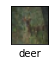

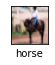

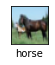

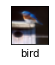

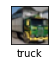

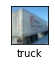

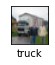

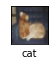

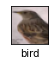

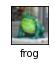

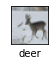

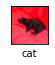

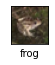

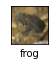

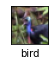

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [ ]:
model= tf.keras.Sequential([
    Input(shape= input_shape),
    layers.Conv2D(32,kernel_size=(3,3), activation="relu", padding='same'),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(1024, activation="relu"),
    layers.Dense(10)
    
])
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              16778240  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 16,807,882
Trainable params: 16,807,882
Non-trainable params: 0
____________________________________________

In [ ]:
train_hist = model.fit(train_images ,train_labels , epochs=50)
model.save('saved_model/scratch')

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0245 - accuracy: 0.9921
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0210 - accuracy: 0.9935
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0177 - accuracy: 0.9946
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0240 - accuracy: 0.9925
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0187 - accuracy: 0.9943
Epoch 8/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0231 - accuracy: 0.9933
Epoch 9/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0250 - accuracy: 0.9927
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 3.8475 - accuracy: 0.6927

Test accuracy: 0.6927000284194946


In [ ]:
model2= tf.keras.Sequential([
    Input(shape=input_shape),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu", input_shape=input_shape),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(1, 1), activation="relu"),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 1), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(10)
])

    

model2.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_6 (Depthwis (None, 16, 16, 3)         30        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        128       
_________________________________________________________________
depthwise_conv2d_7 (Depthwis (None, 8, 8, 32)          320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          2112      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)             

In [ ]:
train_hist = model2.fit(train_images ,train_labels , epochs=50)
model2.save('saved_model2/scratch')

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8926 - accuracy: 0.3055
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4175 - accuracy: 0.4960
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2574 - accuracy: 0.5543
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1575 - accuracy: 0.5905
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0604 - accuracy: 0.6244
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9709 - accuracy: 0.6575
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8839 - accuracy: 0.6917
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7949 - accuracy: 0.7211
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7149 - accuracy: 0.7482
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.624

In [ ]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 4.1928 - accuracy: 0.5958

Test accuracy: 0.59579998254776
